In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import numpy as np

# Create dataset
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

# Model
model = LinearRegression()

# 5-Fold Cross Validation using MSE
scores = cross_val_score(
    model, X, y, cv=5, scoring='neg_mean_squared_error'
)

# Convert to positive MSE
mse_scores = -scores

print("MSE for each fold:", mse_scores)
print("Average CV MSE:", mse_scores.mean())


MSE for each fold: [230.19440484 191.26637894 261.95011089 131.29804227 100.0370986 ]
Average CV MSE: 182.94920710576267


Fold 1 MSE: 4.222135755805732
Fold 2 MSE: 4.877407650345033
Fold 3 MSE: 4.544178564882779
Fold 4 MSE: 2.6561492953791186
Fold 5 MSE: 6.692260543786792


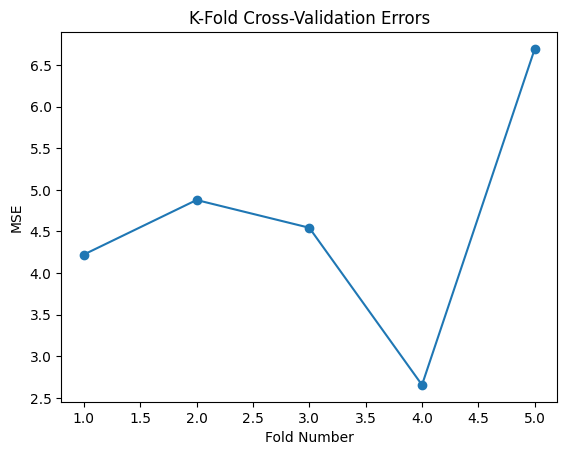

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

# Dataset
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 3 * X.flatten() + np.random.randn(50) * 2

kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

fold = 1
errors = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)

    print(f"Fold {fold} MSE:", mse)
    fold += 1

# Plot CV errors
plt.figure()
plt.plot(range(1, 6), errors, marker='o')
plt.xlabel("Fold Number")
plt.ylabel("MSE")
plt.title("K-Fold Cross-Validation Errors")
plt.show()
